In [1]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [2]:
train_files = 'Train/'
test_files = 'Test/'

train_images  = os.listdir(train_files)
test_images  = os.listdir(test_files)

width  = 195
height = 231

new_size = (195,231)

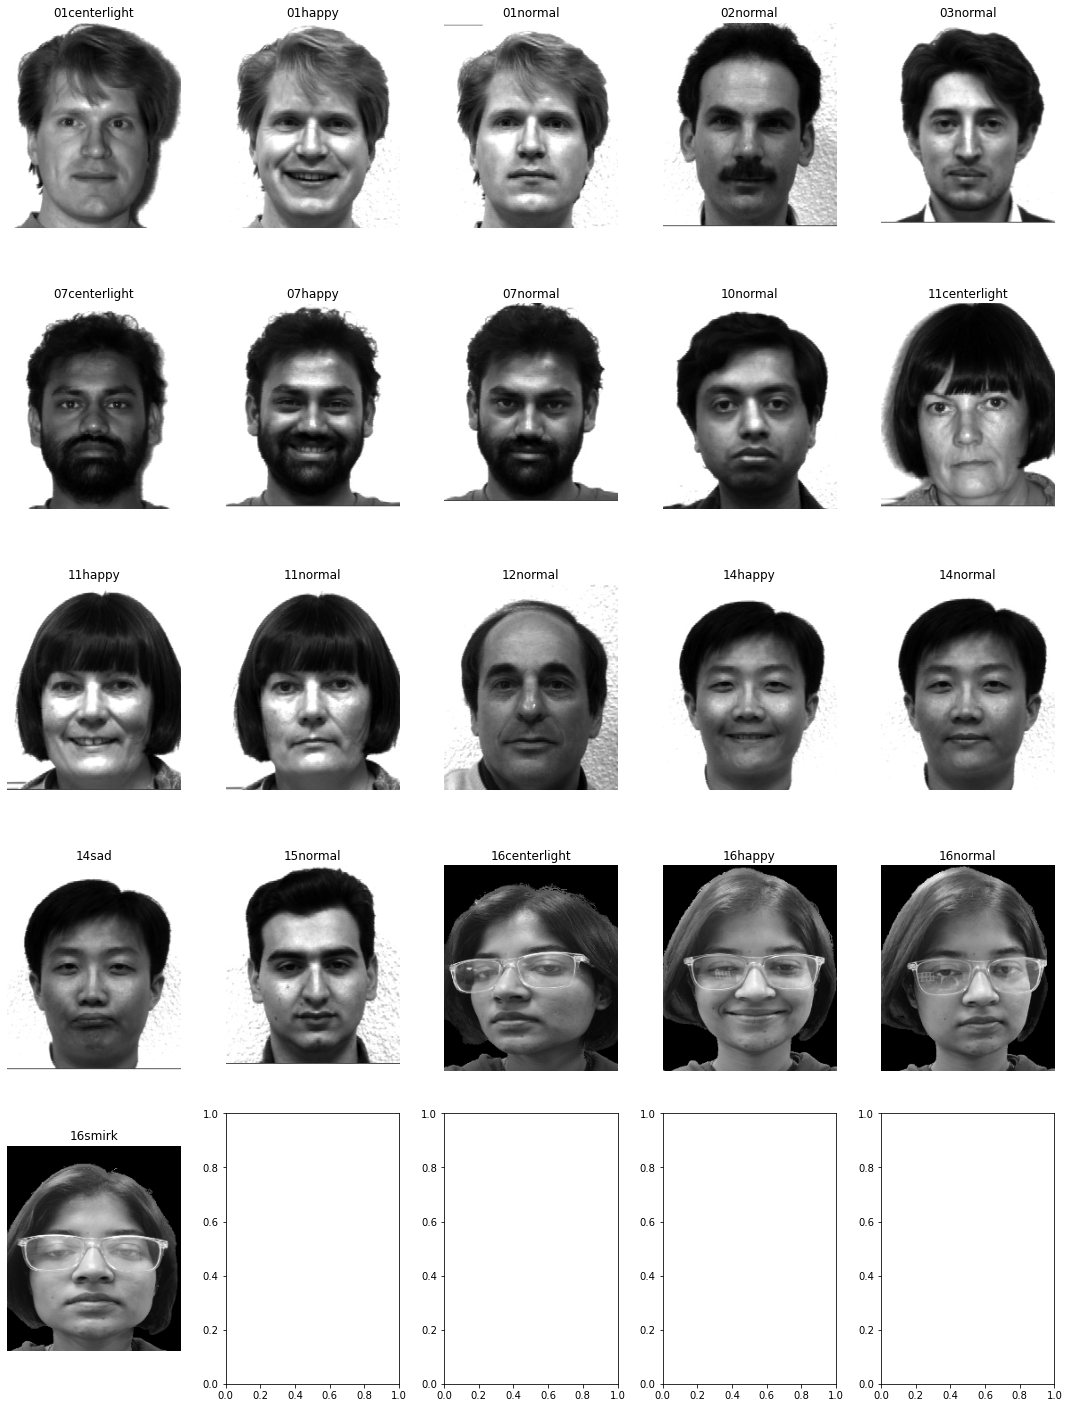

In [3]:
train_image_names = train_images
training_tensor = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

fig, axs = plt.subplots(5, 5, figsize=(15, 20))
axs = axs.flatten()

for i in range(len(train_image_names)):
    img = plt.imread(train_files + train_image_names[i])
    if img.ndim == 3 and img.shape[2] != new_size:
        # Convert to 1 channel grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, new_size)
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(train_image_names[i].split('.')[0][-2:]+train_image_names[i].split('.')[1])
    axs[i].tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

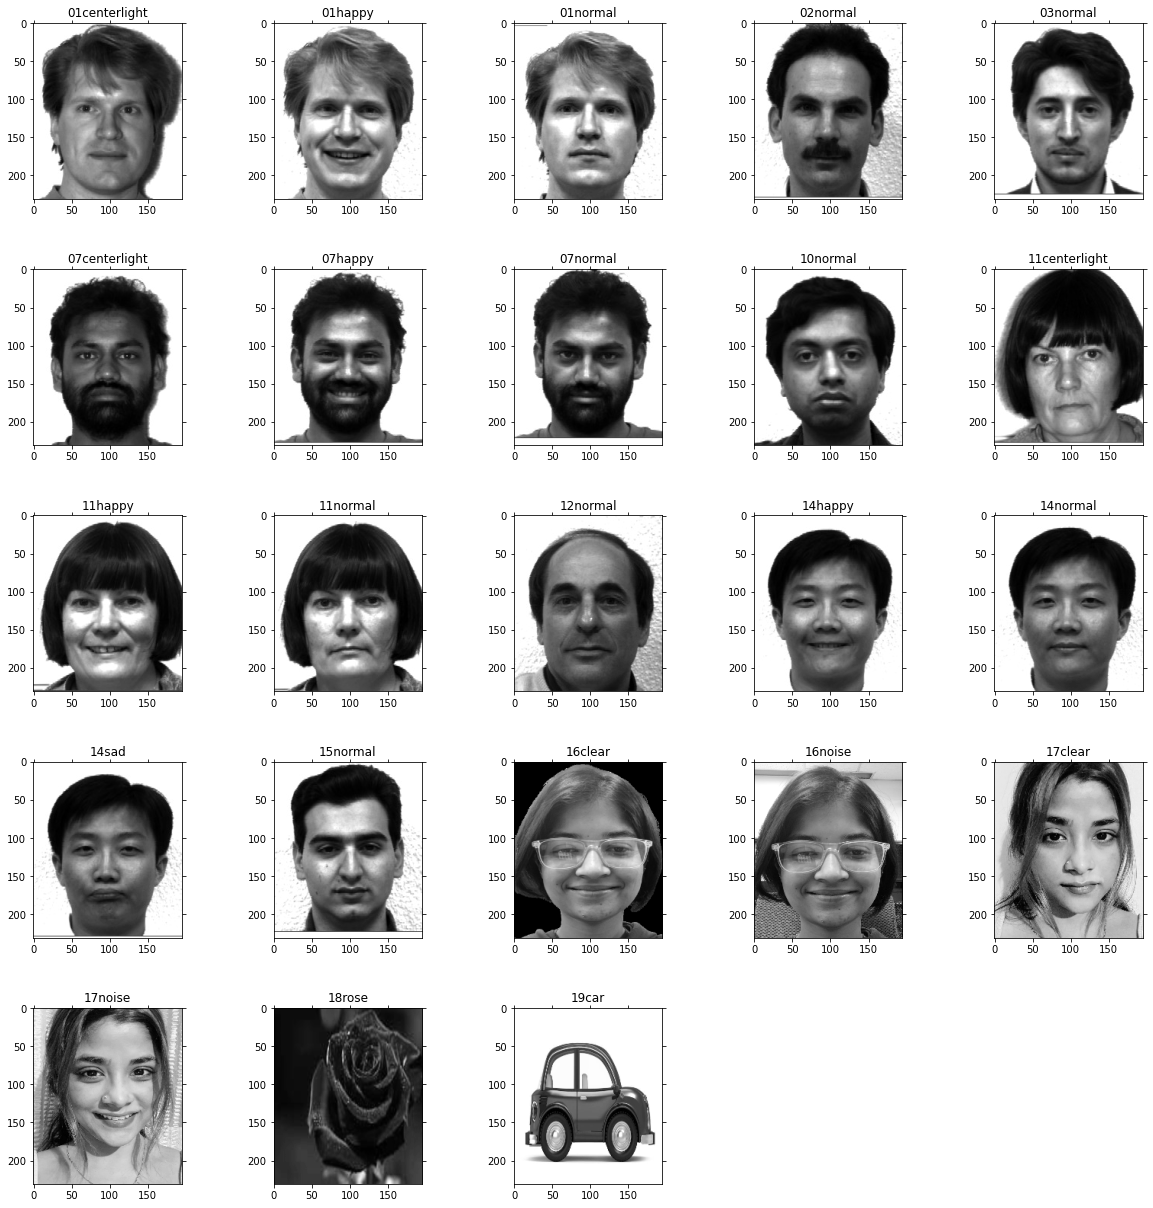

In [4]:
test_image_names = test_images
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

fig = plt.figure(figsize=(15, 15))  # Create a larger figure

for i in range(len(test_image_names)):
    img = imread(test_files + test_image_names[i])
    if img.ndim == 3 and img.shape[2] != new_size:
        # Convert to 1 channel grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, new_size)
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    ax = fig.add_subplot(5,5,1+i)  # Create a subplot axis object
    ax.set_title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    ax.imshow(img, cmap='gray')
    ax.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.2, right=1.2, top=1.2)

plt.show()

######  Mean Face  ######


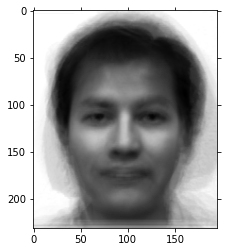

In [5]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()
print("######  Mean Face  ######")
plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [6]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

----  Normalized Face -----


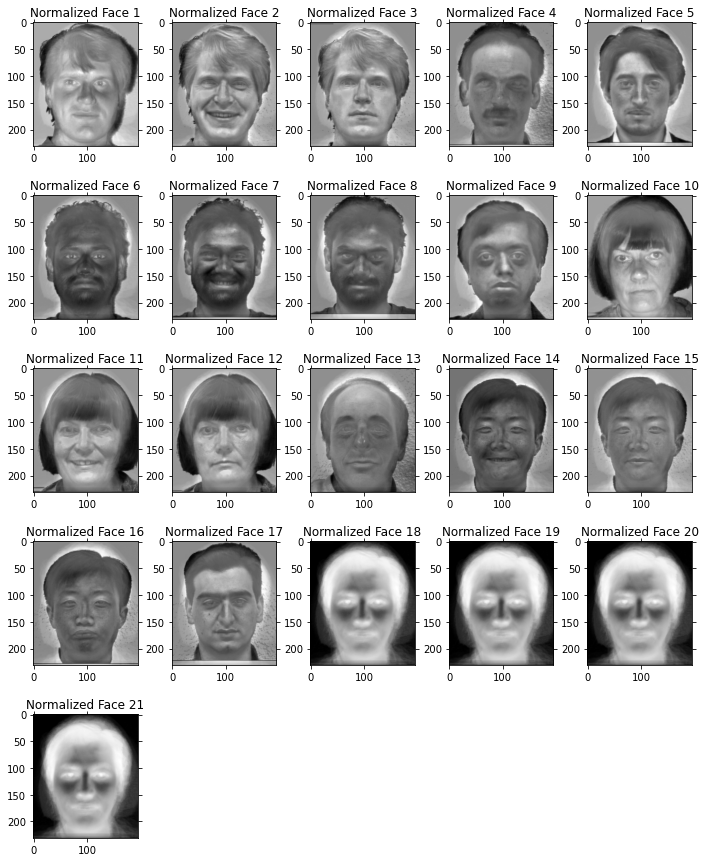

In [7]:
print("----  Normalized Face -----")
fig = plt.figure(figsize=(12, 15))  # Create a larger figure

for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height, width)
    ax = fig.add_subplot(5, 5, i+1)  # Create a subplot axis object
    ax.imshow(img, cmap='gray')
    ax.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')
    ax.set_title(f"Normalized Face {i+1}")  # Set a title for each subplot
    
# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.show()


In [8]:
cov_matrix=np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,25.0)
print('Covariance Matrix Shape:', cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance Matrix Shape: (21, 21)
Covariance matrix of X: 
[[ 9.98300592e+01  2.38080555e+01  1.93510290e+01  4.42687206e+00
   5.68247867e-02 -1.32369811e+01 -2.93894343e+01 -1.53500577e+01
   9.22531039e-01  2.98889827e+01 -8.71505153e+00 -1.27699405e+01
  -2.39611375e+01 -1.62459288e+01 -4.48305569e+00 -1.08854173e+01
   1.10845241e-01 -1.07935935e+01 -1.08803550e+01 -1.08840162e+01
  -1.08002305e+01]
 [ 2.38080555e+01  6.13980854e+01  3.56582267e+01  8.49345109e+00
   2.48524047e+00 -6.15160018e+00 -8.28392433e+00 -1.35328953e+01
   5.61390106e+00 -2.17724236e+01 -1.28268453e+01 -1.63410528e+01
  -4.90857472e+00  9.06225612e+00  3.56946352e+00  2.76533072e+00
  -9.07084630e+00 -1.49501732e+01 -1.50045754e+01 -1.50227241e+01
  -1.49883752e+01]
 [ 1.93510290e+01  3.56582267e+01  6.51680829e+01 -1.19195851e+01
  -1.21996839e+00 -5.94294855e+00 -2.49544513e+01 -3.77522242e+01
   1.24307849e+01 -1.64904241e+01 -9.29108822e-01  5.89349748e+00
   1.04782359e+01  1.69044921e+01  1.59720398

In [9]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)
print('eigenvalues.shape: {} eigenvectors.shape: {}'.format(eigenvalues.shape, eigenvectors.shape))

Eigenvectors of Cov(X): 
[[-7.91541358e-03  2.98754720e-02 -1.00597461e-01  5.65513189e-01
  -1.19566356e-01  1.76430180e-01  1.69213020e-01 -1.44284930e-01
   5.47586190e-01  5.51422847e-02  7.24963754e-02  1.84569619e-01
   3.66354091e-01  1.40964512e-01  1.70563002e-01  3.16393435e-02
  -1.52869401e-02 -2.18217890e-01  2.44033271e-04 -6.22877720e-05
  -2.12025136e-05]
 [ 3.24571089e-02  9.29080862e-03  7.66158838e-02  3.38876305e-01
  -2.02382185e-01 -7.86029714e-02 -3.50719115e-01 -2.75436563e-01
  -9.95153736e-02  1.26350241e-02 -4.25948728e-03 -3.16446652e-01
  -2.77735883e-02 -5.67281673e-01 -1.29116955e-01 -9.61760239e-02
  -3.54693151e-01 -2.18217890e-01  1.54821831e-04  2.89413494e-05
   3.61666997e-04]
 [ 1.81451135e-02  8.37913339e-02  1.79630086e-01  3.32574121e-01
  -1.79958169e-01 -1.47378027e-01 -2.20322559e-01 -8.99975539e-02
  -8.15653821e-02  8.80175273e-03 -1.70886679e-01 -2.35652967e-01
  -3.82340233e-01  5.45291107e-01 -1.61346500e-01  1.46355776e-01
   3.30101737

In [10]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.35204873 0.55460373 0.66664052 0.73415033 0.78317534 0.81988848
 0.85018147 0.87631764 0.90092174 0.92285214 0.94344381 0.95990165
 0.97246015 0.98115631 0.98933302 0.99537281 0.99999935 0.99999968
 0.99999987 1.         1.        ]


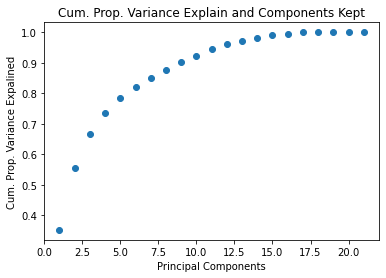

In [11]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [12]:
## Choose the necessary no.of principle components:
reduced_data = np.array(eigvectors_sort[:17]).transpose()

In [13]:
print(training_tensor.transpose().shape, reduced_data.shape)

(45045, 21) (21, 17)


In [14]:
# Now we try to find the projected data. This will form the eigen space.
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

----- Eigenface -----


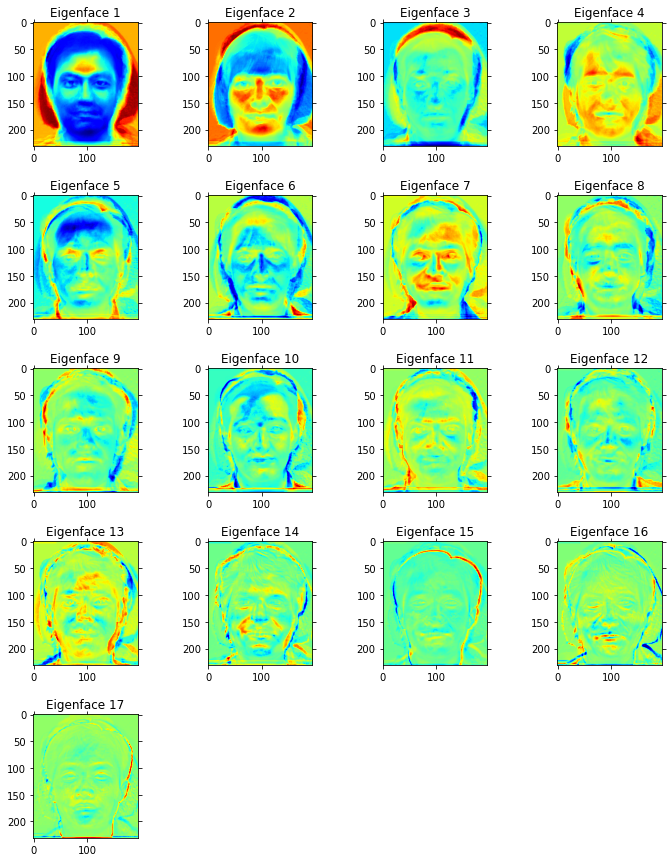

In [15]:
print("----- Eigenface -----")
fig = plt.figure(figsize=(12, 15))  # Create a larger figure

for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height, width)
    ax = fig.add_subplot(5, 4, i+1)  # Create a subplot axis object
    ax.imshow(img, cmap='jet')
    ax.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')
    ax.set_title(f"Eigenface {i+1}")  # Set a title for each subplot
    
# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.show()


In [16]:
## Finding weights for each traning image
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
print(w.shape)
print(w)

(21, 17)
[[ 1.96422887e+08  1.23180906e+08 -6.64529867e+07  1.65968674e+08
  -6.86470275e+07  1.62393548e+07 -2.62563213e+07  7.97685998e+05
   4.55463597e+07  9.13586309e+06 -3.17049804e+07 -1.79722864e+07
   1.12743180e+07  8.26040355e+06 -6.14578243e+05 -3.36695407e+06
   2.56823314e+06]
 [ 5.11475712e+08  2.48491481e+08 -4.69758720e+07  1.82258624e+08
  -1.48029389e+08 -1.76617421e+07 -1.30566352e+08  6.66923793e+06
   1.57229404e+06  1.33991521e+07 -8.46146172e+07 -7.96168061e+07
  -7.89664261e+06 -4.84564736e+06 -1.46926399e+07 -1.37742039e+07
   3.54034289e+06]
 [ 5.49281631e+08  3.22299085e+08 -1.95646150e+07  1.93451840e+08
  -1.57789748e+08 -2.64409597e+07 -1.29321292e+08  2.48783956e+07
   3.96017089e+06  1.45452944e+07 -1.04665056e+08 -8.26300702e+07
  -2.24142086e+07  2.62021400e+07 -1.67878173e+07 -1.80161980e+06
   7.55689934e+06]
 [ 3.17950968e+08  2.96601503e+05 -1.10278961e+08  5.48159088e+07
  -9.48296496e+07  4.08337090e+07 -6.07612843e+07  1.53518615e+07
  -3.36917

In [17]:
from skimage.metrics import mean_squared_error

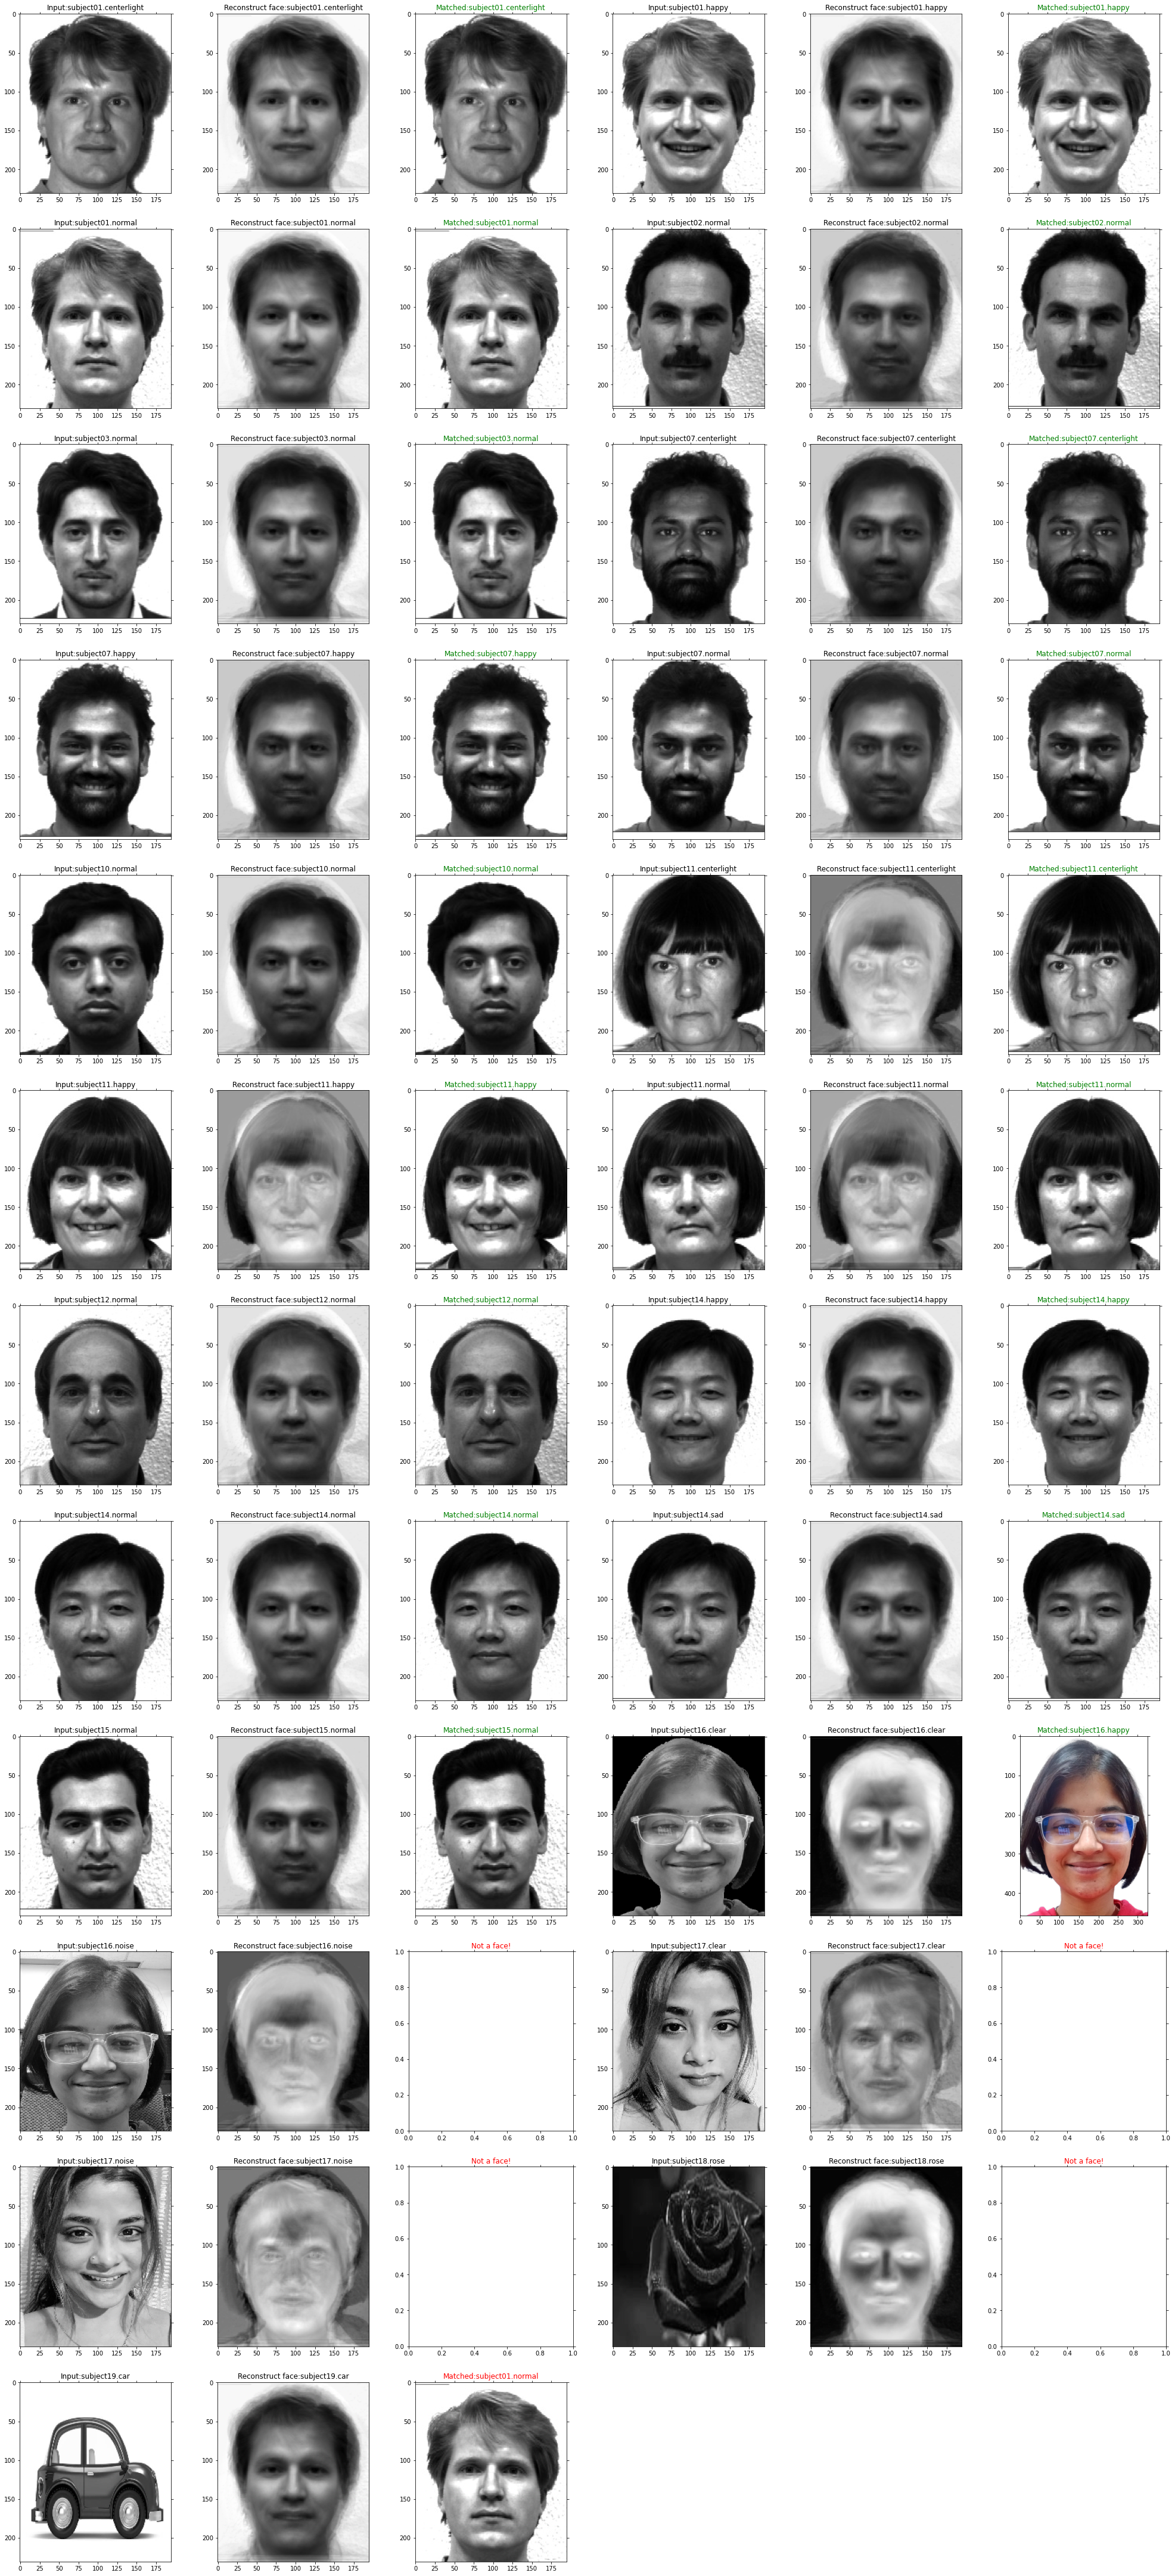

Correct predictions: 18/23 = 78.26086956521739%
MSE -  {'subject01.centerlight.jpg': 6.239550036167769e+21, 'subject01.happy.jpg': 3.329211970659112e+22, 'subject01.normal.jpg': 4.0597487347530855e+22, 'subject02.normal.jpg': 8.949947630396149e+21, 'subject03.normal.jpg': 3.1295978032787114e+22, 'subject07.centerlight.jpg': 1.247242374130741e+22, 'subject07.happy.jpg': 2.2571253627394894e+22, 'subject07.normal.jpg': 1.5131601406960918e+22, 'subject10.normal.jpg': 1.398490405739857e+22, 'subject11.centerlight.jpg': 5.998491529258899e+21, 'subject11.happy.jpg': 2.3564167243202295e+21, 'subject11.normal.jpg': 2.2315272784579912e+21, 'subject12.normal.jpg': 8.885300285269624e+21, 'subject14.happy.jpg': 2.9767530405032274e+22, 'subject14.normal.jpg': 2.3148234017152566e+22, 'subject14.sad.jpg': 2.3466782363695582e+22, 'subject15.normal.jpg': 2.662147367285463e+22, 'subject16.clear.jpg': 2.227218945140793e+23, 'subject16.noise.jpeg': 3.346012736145423e+21, 'subject17.clear.jpg': 7.1005697894

In [19]:
## MSE 
mse_dict = {}
# Final

count        = 0
num_images   = 0
correct_pred = 0

def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred,mse_dict
    unknown_face        = plt.imread('Test/'+img)
    num_images          += 1

    if unknown_face.ndim == 3 and unknown_face.shape[2] != new_size:
        # Convert to 1 channel grayscale
        unknown_face = cv2.cvtColor(unknown_face, cv2.COLOR_BGR2GRAY)
        unknown_face = cv2.resize(unknown_face,new_size)

    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(12,6,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    # Reconstruct face image using eigenfaces
    weights = w[index]
    # face_vector = mean_face + np.dot(weights, proj_data)
    face_vector = mean_face + np.dot(w_unknown, proj_data)
    face_vector = face_vector.reshape(height, width)

    plt.subplot(12,6,1+count)
    plt.imshow(face_vector, cmap='gray')
    plt.title('Reconstruct face:'+'.'.join(img.split('.')[:2]))
    count+=1

    #t1 = 100111536
    t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    #t0 = 88831687
    t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(12,6,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('Train/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('Train/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] :
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(12,6,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

    mse_dict[img] = mean_squared_error(unknown_face, face_vector)

fig = plt.figure(figsize=(25, 25))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))
print("MSE - ",mse_dict)

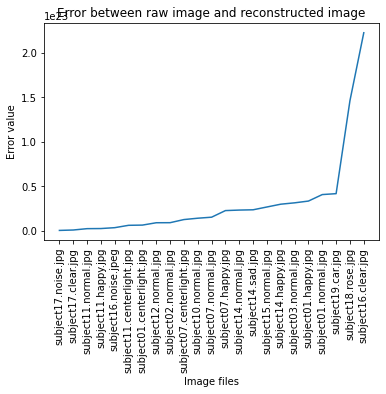

In [21]:
# Sort the image file names in ascending order of error (lowest to highest)
sorted_files = sorted(mse_dict, key=mse_dict.get)

# Create a line plot of the error values, with sorted image file names on the x-axis
plt.plot(sorted_files, [mse_dict[file] for file in sorted_files])

# Set the x-axis label and rotate the labels for better visibility
plt.xlabel('Image files')
plt.xticks(rotation=90, ticks=sorted_files)

# Set the y-axis label
plt.ylabel('Error value')

# Set the chart title
plt.title('Error between raw image and reconstructed image')

# Display the chart
plt.show()